In [1]:
import plaidml.keras
plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
from keras import models, layers
import numpy as np
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dense, Lambda
from sklearn.model_selection import train_test_split
import warnings
from keras.callbacks import TensorBoard
import time
import scipy.stats
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.models import Sequential
from keras.layers import Dense

warnings.filterwarnings("ignore")

In [3]:
import os
os.getcwd()

'/home/siyi/Desktop/PlayGround/digit-recognizer'

In [4]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submisssion = pd.read_csv("./sample_submission.csv")

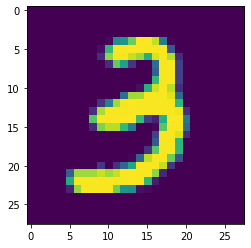

In [5]:
plt.imshow(np.array(test[7:8]).reshape(28, 28))
plt.show()
x = 3
y = "string"

In [6]:
X = train.iloc[:, 1:]/255.
y = train.iloc[:, 0]
test = test/255.

In [7]:
# reshaping 784 to 28,28,1
X = X.values.reshape(train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)

In [8]:
# one hot of target values using keras's to_categorical class
y = to_categorical(y)

# splits train/test set
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=29)

# Shape
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((33600, 28, 28, 1), (33600, 10), (8400, 28, 28, 1), (8400, 10))

In [9]:
# in model i am using BatchNormalization so for first step, i menualy normalize the batch
mean_px = Xtrain.mean().astype(np.float32)
std_px = Xtrain.std().astype(np.float32)

def standardize(x):
    return (x-mean_px)/std_px

#Create a new activation function
from keras import backend as K
def custom_activation(x):
    return (K.exp(-((x-4)**2)))

In [10]:
# this is a model with dropouts layers
def cnn():
    model = models.Sequential()
    model.add(Lambda(standardize, input_shape=(28, 28, 1)))
    model.add(Convolution2D(32, (3, 3), activation="relu"))
    model.add(Convolution2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D())
    model.add(Convolution2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def cnn_N():
    model = models.Sequential()
    model.add(Lambda(standardize, input_shape=(28, 28, 1)))
    model.add(Convolution2D(32, (3, 3), activation="relu"))
    model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D())
    model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D())
    model.add(BatchNormalization(axis=1))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [11]:
classifier = cnn()
history = classifier.fit(Xtrain, ytrain, epochs=20, batch_size=1000, validation_data=(Xtest, ytest))

INFO:plaidml:Opening device "opencl_nvidia_geforce_gtx_1070.0"


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 18s 522us/step - loss: 0.6294 - acc: 0.7983 - val_loss: 0.1287 - val_acc: 0.9607
Epoch 2/20
33600/33600 [==============================] - 4s 114us/step - loss: 0.1069 - acc: 0.9671 - val_loss: 0.0743 - val_acc: 0.9779
Epoch 3/20
33600/33600 [==============================] - 4s 115us/step - loss: 0.0621 - acc: 0.9809 - val_loss: 0.0529 - val_acc: 0.9849
Epoch 4/20
33600/33600 [==============================] - 4s 116us/step - loss: 0.0484 - acc: 0.9855 - val_loss: 0.0464 - val_acc: 0.9851
Epoch 5/20
33600/33600 [==============================] - 4s 115us/step - loss: 0.0402 - acc: 0.9871 - val_loss: 0.0439 - val_acc: 0.9876
Epoch 6/20
33600/33600 [==============================] - 4s 115us/step - loss: 0.0331 - acc: 0.9896 - val_loss: 0.0440 - val_acc: 0.9882
Epoch 7/20
33600/33600 [==============================] - 4s 116us/step - loss: 0.0270 - acc: 0.9909 - val_loss: 0.0524 - 

In [12]:
classifier_BN = cnn_N()
history_BN = classifier_BN.fit(Xtrain, ytrain, epochs=20, batch_size=1000, validation_data=(Xtest, ytest))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 29s 859us/step - loss: 0.5037 - acc: 0.8369 - val_loss: 2.1464 - val_acc: 0.1161
Epoch 2/20
33600/33600 [==============================] - 5s 155us/step - loss: 0.5037 - acc: 0.8452 - val_loss: 3.2713 - val_acc: 0.1105
Epoch 3/20
33600/33600 [==============================] - 5s 155us/step - loss: 0.9637 - acc: 0.7090 - val_loss: 1.7889 - val_acc: 0.2061
Epoch 4/20
33600/33600 [==============================] - 5s 156us/step - loss: 0.3698 - acc: 0.8837 - val_loss: 1.8850 - val_acc: 0.2661
Epoch 5/20
33600/33600 [==============================] - 5s 155us/step - loss: 0.3280 - acc: 0.8964 - val_loss: 1.6291 - val_acc: 0.3906
Epoch 6/20
33600/33600 [==============================] - 5s 156us/step - loss: 0.4868 - acc: 0.8369 - val_loss: 2.4740 - val_acc: 0.2076
Epoch 7/20
33600/33600 [==============================] - 5s 157us/step - loss: 0.5168 - acc: 0.8308 - val_loss: 2.2651 - 

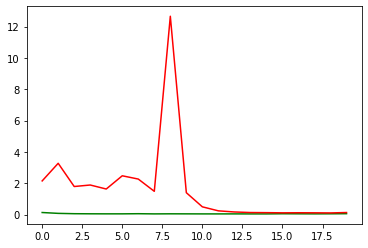

In [13]:
plt.plot(history.history['val_loss'],'g')
plt.plot(history_BN.history['val_loss'],'r')
plt.show()

In [14]:
# prediction of submission_test set
prediction = classifier.predict(test)
validation = classifier.predict(Xtest)
predictions = np.argmax(prediction, axis=1)

In [15]:
validations = np.argmax(validation,axis = 1)
y_test= np.argmax(ytest,axis = 1)
print(y_test[0:30])
print(validations[0:30])

[1 0 2 5 1 7 8 2 6 7 6 1 5 0 6 3 7 4 3 4 1 1 0 5 5 6 9 9 7 9]
[1 0 2 5 1 7 8 2 6 7 6 1 5 0 6 3 7 4 3 4 1 1 0 5 5 6 9 9 7 9]


In [16]:
# submission
submissions = pd.DataFrame({"ImageId": list(range(1, len(predictions)+1)),
                            "Label": predictions})
print(submissions)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [17]:
submissions.to_csv("submit.csv", index=False, header=True)
submissions.shape

(28000, 2)